In [1]:
import pandas as pd
import numpy as np
#from pycorenlp import StanfordCoreNLP
import time
import sqlalchemy
import sqlite3
from itertools import count
from pysal.lib import weights
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
# from pysal.esda.mapclassify import K
# from seaborn.palettes import color_palette
from shapely.geometry import Point
import openpyxl
import pymssql
from esda.getisord import G_Local 

c:\Users\sansa\miniconda3\envs\polygence\lib\site-packages\pysal\explore\segregation\network\network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
c:\Users\sansa\miniconda3\envs\polygence\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
#Set for identical results
np.random.seed(2021)
#Import Relevant Country Shapefile
poly = gpd.read_file("C:/Users/sansa/Hotspot/Polygence Data/CA_Counties/CA_Counties_TIGER2016.shp")

#Repull conflict data (did this so I didn't have to continue to connect ICC vpn)
covid = pd.read_csv("C:/Users/sansa/Hotspot/Polygence Data/Dual Monthly Data/Sep_Oct 2021 Hotspot Dataset - SubrecipientDetailReport (1).csv")


<AxesSubplot:>

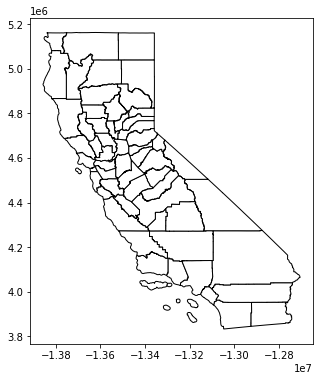

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
poly.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})

In [4]:
covid.head

<bound method NDFrame.head of                         Subrecipient             NAME  Total Covid Cases  \
0                  County of Alameda          Alameda              10494   
1                   County of Alpine           Alpine                 13   
2                   County of Amador           Amador                981   
3                    County of Butte            Butte               5735   
4                County of Calaveras        Calaveras               1078   
5                   County of Colusa           Colusa                356   
6             County of Contra Costa     Contra Costa               9777   
7                County of Del Norte        Del Norte                797   
8                County of El Dorado        El Dorado               2725   
9                   County of Fresno           Fresno              23015   
10                   County of Glenn            Glenn                830   
11                County of Humboldt         Humboldt     

In [5]:
poly = poly[['NAME', 'geometry']]
poly.head

<bound method NDFrame.head of                NAME                                           geometry
0            Sierra  POLYGON ((-13431319.751 4821511.426, -13431312...
1        Sacramento  POLYGON ((-13490651.476 4680831.603, -13490511...
2     Santa Barbara  MULTIPOLYGON (((-13423116.772 4042044.149, -13...
3         Calaveras  POLYGON ((-13428575.483 4627725.228, -13428534...
4           Ventura  MULTIPOLYGON (((-13317853.594 3931602.414, -13...
5       Los Angeles  MULTIPOLYGON (((-13210018.388 3958856.141, -13...
6            Sonoma  POLYGON ((-13685069.767 4623872.832, -13685073...
7             Kings  POLYGON ((-13353767.857 4335831.239, -13353767...
8         San Diego  POLYGON ((-13073075.796 3919158.524, -13074423...
9            Placer  POLYGON ((-13476944.153 4722608.150, -13476936...
10    San Francisco  MULTIPOLYGON (((-13647797.317 4551561.433, -13...
11            Marin  POLYGON ((-13668520.001 4563468.198, -13668591...
12         Mariposa  POLYGON ((-13394132.438 45

In [6]:
df  = covid.merge(poly, on='NAME', how='left')

In [7]:
df = gpd.GeoDataFrame(df, geometry='geometry')
df.head

<bound method NDFrame.head of                         Subrecipient             NAME  Total Covid Cases  \
0                  County of Alameda          Alameda              10494   
1                   County of Alpine           Alpine                 13   
2                   County of Amador           Amador                981   
3                    County of Butte            Butte               5735   
4                County of Calaveras        Calaveras               1078   
5                   County of Colusa           Colusa                356   
6             County of Contra Costa     Contra Costa               9777   
7                County of Del Norte        Del Norte                797   
8                County of El Dorado        El Dorado               2725   
9                   County of Fresno           Fresno              23015   
10                   County of Glenn            Glenn                830   
11                County of Humboldt         Humboldt     

In [8]:
w = weights.distance.KNN.from_dataframe(poly, k=8)

c:\Users\sansa\miniconda3\envs\polygence\lib\site-packages\pysal\lib\weights\util.py:1028: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in iterable])


In [9]:
lisa = esda.moran.Moran_Local(df['Total Covid Cases'], w)

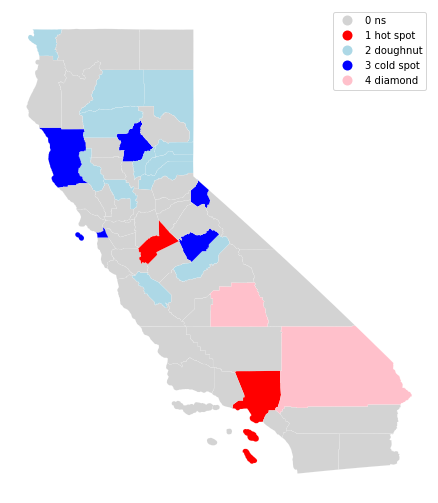

In [10]:
sig = 1 * (lisa.p_sim < 0.25)
hotspot = 1 * (sig * lisa.q==1)
coldspot = 3 * (sig * lisa.q==3)
doughnut = 2 * (sig * lisa.q==2)
diamond = 4 * (sig * lisa.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()